Weinberger, S. (2013). Speech accent archive. George Mason University. 
Dataset provided by GMU.

Sagar Ranga - rsagar@vt.edu <br>
Shaheer Sajid - shaheer@vt.edu

Team 6 - Accent Multiclassification

In [1]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook

Download the dataset from Kaggle and extract it to the data folder.
https://www.kaggle.com/datasets/rtatman/speech-accent-archive/data

In [2]:
os.chdir("C:/Users/sagar/Documents/ML/Final Project/ML-AccentMulticlassification/data")
print(os.listdir("C:/Users/sagar/Documents/ML/Final Project/ML-AccentMulticlassification/data"))

['mlruns', 'multiple_accent_classification', 'reading-passage.txt', 'recordings', 'speakers_all.csv']


In [3]:
#load the data 
df = pd.read_csv("speakers_all.csv", header=0)

# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


Columns 9-11 are empty so we clean up the dataframe.

In [4]:
df.drop(df.columns[9:12],axis = 1, inplace = True)
print(df.columns)
df.describe()

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?'],
      dtype='object')


,age,age_onset,speakerid
count,2172.000000,2172.000000,2172.000000
mean,33.117173,8.833333,1088.449355
std,14.453039,8.451127,628.420329
min,0.000000,0.000000,1.000000
25%,22.000000,0.000000,543.750000
50%,28.000000,8.000000,1088.500000
75%,41.000000,13.000000,1632.250000
max,97.000000,86.000000,2176.000000


In [5]:
df.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
native_language,,,,,,,,
english,579.0,34.482729,16.734510,6.0,21.00,29.0,44.0,90.0
spanish,162.0,34.129630,13.972528,17.0,23.00,30.0,45.0,80.0
arabic,102.0,30.950980,12.047248,18.0,21.25,28.0,38.0,70.0
mandarin,65.0,30.015385,8.193924,18.0,24.00,28.0,34.0,53.0
french,63.0,33.333333,16.246091,18.0,21.00,27.0,39.0,78.0
...,...,...,...,...,...,...,...,...
ife,1.0,30.000000,NaN,30.0,30.00,30.0,30.0,30.0
ilonggo,1.0,53.000000,NaN,53.0,53.00,53.0,53.0,53.0
irish,1.0,28.000000,NaN,28.0,28.00,28.0,28.0,28.0


There are 214 different native language speakers. However, the top 5 native languages don't distinguish speakers well enough.

In [6]:
df.groupby("country")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
usa,393.0,35.652672,18.044364,6.0,21.00,29.0,47.0,90.0
china,88.0,29.477273,9.654940,18.0,23.00,27.0,33.0,72.0
uk,67.0,33.104478,14.900818,18.0,20.00,30.0,38.0,71.0
india,59.0,30.864407,11.501810,18.0,22.00,28.0,35.0,64.0
canada,54.0,31.629630,14.713998,18.0,21.25,26.5,37.5,78.0
...,...,...,...,...,...,...,...,...
chad,1.0,21.000000,NaN,21.0,21.00,21.0,21.0,21.0
burundi,1.0,36.000000,NaN,36.0,36.00,36.0,36.0,36.0
the bahamas,1.0,19.000000,NaN,19.0,19.00,19.0,19.0,19.0


Ordering by countries brings us back to 176 rows. Top 5 countries of speakers is much different from the native languages. Additionally, USA can be further subdivided for accents from different regions in there.

In [7]:
df.groupby("sex")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
famale,1.0,65.000000,NaN,65.0,65.0,65.0,65.0,65.0
female,1048.0,34.072519,15.337869,0.0,22.0,29.0,43.0,89.0
male,1123.0,32.197240,13.492936,0.0,22.0,28.0,39.0,97.0


About an equal count of male to female speakers.

In [8]:
df.groupby("birthplace")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
birthplace,,,,,,,,
"seoul, south korea",25.0,32.040000,12.300000,18.0,23.0,27.0,40.00,62.0
"skopje, macedonia",21.0,20.047619,1.160870,19.0,19.0,20.0,20.00,24.0
"hong kong, china",19.0,23.473684,4.753577,18.0,19.5,22.0,27.00,33.0
"addis ababa, ethiopia",16.0,28.875000,8.663140,20.0,22.5,27.5,31.00,52.0
"bogota, colombia",14.0,36.785714,20.881271,17.0,21.0,30.5,48.25,80.0
...,...,...,...,...,...,...,...,...
"jalandhar, india",1.0,42.000000,NaN,42.0,42.0,42.0,42.00,42.0
"jalisco, mexico",1.0,45.000000,NaN,45.0,45.0,45.0,45.00,45.0
"jammu, kashmir, india",1.0,25.000000,NaN,25.0,25.0,25.0,25.00,25.0


In [9]:
df.groupby("filename")['age'].describe().sort_values(by=['count'],ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
filename,,,,,,,,
haitian,6.0,36.333333,13.952300,18.0,25.75,41.0,42.75,54.0
swiss,5.0,30.200000,8.318654,21.0,24.00,30.0,34.00,42.0
nicaragua,4.0,37.000000,12.569805,20.0,32.75,39.0,43.25,50.0
jamaican,3.0,36.333333,28.307832,19.0,20.00,21.0,45.00,69.0
liberian,2.0,33.000000,7.071068,28.0,30.50,33.0,35.50,38.0
hawai'i,2.0,71.000000,2.828427,69.0,70.00,71.0,72.00,73.0
afrikaans1,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
mandarin46,1.0,43.000000,NaN,43.0,43.00,43.0,43.00,43.0
mandarin42,1.0,47.000000,NaN,47.0,47.00,47.0,47.00,47.0


In [10]:
fname = 'recordings/recordings/' + 'english27.mp3'
ipd.Audio(fname)

Seeing the data provided, the best way to classify the accents would be a country based classifier.

Plan to use librosa library to perform MFCC feature extraction on the audio files.

In [11]:
import librosa
import librosa.display

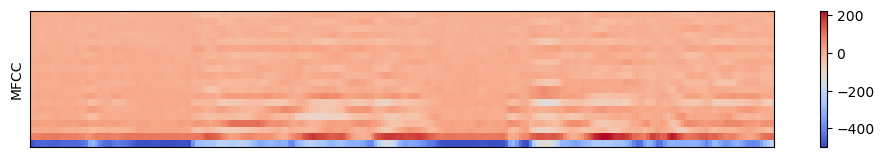

In [12]:
# MFCC for female 
SAMPLE_RATE = 22050
fname_f = 'recordings/recordings/' + 'english385.mp3'  
y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 20) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

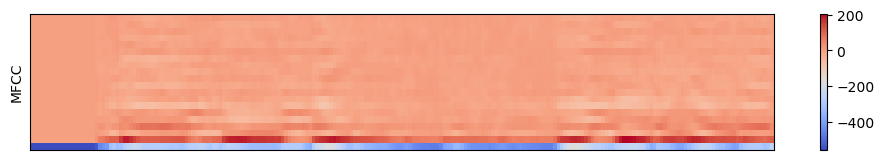

In [13]:
# MFCC for male  
SAMPLE_RATE = 22050
fname_m = 'recordings/recordings/' + 'english381.mp3'  
y, sr = librosa.load(fname_m, sr=SAMPLE_RATE, duration = 5)
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 20)

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

In [14]:
import torch
import torchaudio
import torchaudio.transforms as transforms

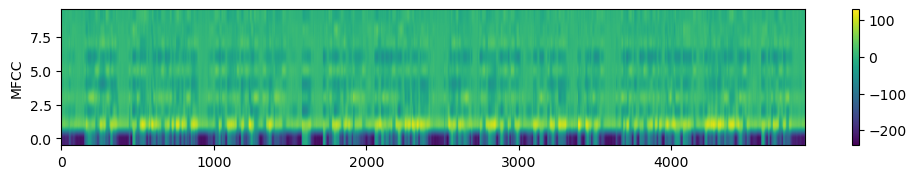

In [15]:
fname_m = 'recordings/recordings/english385.mp3'
waveform, sample_rate = torchaudio.load(fname_m, normalize=True)

# Resample if needed (if your sample rate is not 22050)
resampler = transforms.Resample(orig_freq=sample_rate, new_freq=22050)
waveform = resampler(waveform)

# Compute MFCCs
mfcc_transform = transforms.MFCC(
    sample_rate=22050,
    n_mfcc=10,  # Number of MFCC features
    melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40}
)
mfcc = mfcc_transform(waveform)

# Display MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.imshow(mfcc[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [16]:
mfcc

tensor([[[-216.3252, -206.4052, -207.9324,  ..., -203.0300, -200.8715,
          -206.5858],
         [  33.0318,   38.7279,   36.9994,  ...,   51.6909,   48.0851,
            41.6934],
         [   6.1854,    5.2527,    4.9118,  ...,   -2.5246,   -9.2375,
           -10.8919],
         ...,
         [   1.6038,    2.0768,    7.5726,  ...,   -2.3788,   -4.1762,
           -12.6310],
         [   0.7999,    0.6544,    0.5445,  ...,    2.6766,    4.9561,
            -0.4202],
         [  -5.7705,   -4.5411,   -1.9718,  ...,    1.8993,    1.3310,
             0.2366]]])

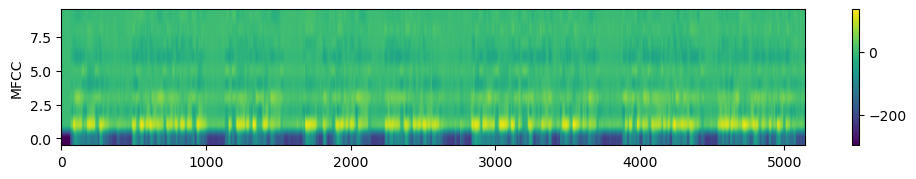

In [17]:
fname_m = 'recordings/recordings/english381.mp3'
waveform, sample_rate = torchaudio.load(fname_m, normalize=True)

# Resample if needed (if your sample rate is not 22050)
resampler = transforms.Resample(orig_freq=sample_rate, new_freq=22050)
waveform = resampler(waveform)

# Compute MFCCs
mfcc_transform = transforms.MFCC(
    sample_rate=22050,
    n_mfcc=10,  # Number of MFCC features
    melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40}
)
mfcc = mfcc_transform(waveform)

# Display MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.imshow(mfcc[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

Torch Audio MFCC extraction works well and our model will be trained in torch.

In [18]:
import transformers
import gc
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

We get the labels from the audio files using the csv file. One hot encoding is used to convert labels to numbers.

In [19]:
RATE_HZ = 16000 # resampling rate in Hz
MAX_LENGTH = 160000 # maximum audio interval length to consider (= RATE_HZ * SECONDS)
labels = ['usa', 'china', 'uk', 'india', 'canada', 'other']
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

print(id2label, '\n\n', label2id)

{0: 'usa', 1: 'china', 2: 'uk', 3: 'india', 4: 'canada', 5: 'other'} 

 {'usa': 0, 'china': 1, 'uk': 2, 'india': 3, 'canada': 4, 'other': 5}


In [20]:
print(type(label2id['usa']))

<class 'int'>


CNN takes torch.long as inputs, not int. Testing here to convert the labels to torch.long

In [21]:
label2id_torch = {k: torch.tensor(v, dtype=torch.long) for k, v in label2id.items()}

label2id_torch

{'usa': tensor(0),
 'china': tensor(1),
 'uk': tensor(2),
 'india': tensor(3),
 'canada': tensor(4),
 'other': tensor(5)}

In [22]:
from pathlib import Path

In [23]:
lang_counter = dict()

def load_data(df):
    file_list = []
    label_list = []
    for index, row in df.iterrows():
        country = row['country']  #'country' is the column containing country labels
        filename = row['filename']
        file_missing = row['file_missing?']
        
        # Skip if the file is missing
        if file_missing:
            continue
            
        lang = country  # 'country' represents the language label
        
        if lang not in lang_counter.keys():
            lang_counter[lang] = 1
        else:
            lang_counter[lang] += 1

        # if not in our selected langs then 'other'
        if lang not in labels[:-1]:
            lang = labels[-1]
        
        file_list.append(f'recordings/recordings/{filename}.mp3')
        label_list.append(label2id[lang])
    dd = pd.DataFrame()
    dd['file'] = file_list
    dd['label'] = label_list
    return dd

In [24]:
%%time
dd = load_data(df)
dd.sample(5)

CPU times: total: 0 ns
Wall time: 49.6 ms


,file,label
879,recordings/recordings/english71.mp3,0
113,recordings/recordings/arabic75.mp3,5
505,recordings/recordings/english256.mp3,0
2024,recordings/recordings/turkish21.mp3,5
812,recordings/recordings/english532.mp3,0


In [25]:
dd['label'].value_counts()

label
5    1482
0     391
1      88
2      67
3      58
4      54
Name: count, dtype: int64

Random Undersampling and Oversampling done to normalize the dataset.

In [26]:
# random undersampling of a majority class
rus = RandomUnderSampler(random_state=83, sampling_strategy='majority')
y = dd[['label']]
dd = dd.drop(['label'], axis=1)
dd, y_resampled = rus.fit_resample(dd, y)
del y
dd['label'] = y_resampled
del y_resampled
# random oversampling of all minority classes
y = dd[['label']]
dd = dd.drop(['label'], axis=1)
ros = RandomOverSampler(random_state=83)
dd, y_resampled = ros.fit_resample(dd, y)
del y
dd['label'] = y_resampled
del y_resampled
gc.collect()

4780

In [27]:
dd.shape, dd['label'].value_counts()

((2346, 2),
 label
 0    391
 1    391
 2    391
 3    391
 4    391
 5    391
 Name: count, dtype: int64)

In [28]:
from tqdm import tqdm
tqdm.pandas()

Preprocessing the audio files to resample and transform it. We take only the first 10 seconds of the audio.

In [29]:
def get_transform_audio(file):
    audio,rate = torchaudio.load(str(file))
    transform = torchaudio.transforms.Resample(rate,RATE_HZ)
    audio = transform(audio).squeeze(0).numpy()
    audio = audio[:MAX_LENGTH] # truncate to first part of audio to save RAM
    return audio

dd['audio'] = dd['file'].progress_apply(get_transform_audio)

100%|██████████| 2346/2346 [00:46<00:00, 50.25it/s]


In [30]:
%%time
dd = dd.drop(['file'], axis=1)

CPU times: total: 0 ns
Wall time: 8.51 ms


In [31]:
dd.sample(5)

,label,audio
1702,4,"[0.02397908, 0.038726434, 0.039565787, 0.04125..."
1022,2,"[7.812888e-06, 1.0128381e-05, 8.668688e-06, 1...."
129,0,"[-0.025472583, -0.028658083, -0.0133714825, -0..."
575,3,"[0.005326325, 0.009433268, 0.008846956, 0.0095..."
1969,4,"[0.001017792, 0.0018787439, 0.0025226392, 0.00..."


In [32]:
from datasets import Dataset, ClassLabel, DatasetDict

dd = Dataset.from_pandas(dd)

In [33]:
newdd = torch.tensor(dd['label'], dtype=torch.long)

In [34]:
from collections import Counter
Counter(dd['label']).items()

dict_items([(0, 391), (1, 391), (2, 391), (3, 391), (4, 391), (5, 391)])

Splitting the data into 80-20 split

In [35]:
dd = dd.train_test_split(test_size=0.2)
dd

DatasetDict({
    train: Dataset({
        features: ['label', 'audio'],
        num_rows: 1876
    })
    test: Dataset({
        features: ['label', 'audio'],
        num_rows: 470
    })
})

In [36]:
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification

model_str = "facebook/wav2vec2-base-960h" 
feature_extractor=AutoFeatureExtractor.from_pretrained(model_str)
model=AutoModelForAudioClassification.from_pretrained(model_str,num_labels=len(labels))
model.config.id2label = id2label
# number of trainable parameters
print(model.num_parameters(only_trainable=True)/1e6)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


94.570118


In [37]:
dd["test"]

Dataset({
    features: ['label', 'audio'],
    num_rows: 470
})

Preprocessing function that converts the dictionary labels from int to torch.long

In [38]:
def preprocess_function(batch):    
    inputs = {}
    inputs['labels'] = torch.tensor(batch['label'], dtype=torch.long)

    return inputs

dd['test'] = dd['test'].map(preprocess_function, remove_columns="label", batched=False)
dd['train'] = dd['train'].map(preprocess_function, remove_columns="label", batched=False)

Map:   0%|          | 0/470 [00:00<?, ? examples/s]

Map:   0%|          | 0/1876 [00:00<?, ? examples/s]

In [39]:
dd["test"]

Dataset({
    features: ['audio', 'labels'],
    num_rows: 470
})

Performing Feature Extraction on the transformed audio

In [40]:
def preprocess_function(batch):    

    inputs = feature_extractor(batch['audio'], sampling_rate=RATE_HZ, max_length=MAX_LENGTH, truncation=True)
    inputs['input_values'] = inputs['input_values'][0]

    return inputs

dd['test'] = dd['test'].map(preprocess_function, remove_columns="audio", batched=False)
dd['train'] = dd['train'].map(preprocess_function, remove_columns="audio", batched=False)

Map:   0%|          | 0/470 [00:00<?, ? examples/s]

Map:   0%|          | 0/1876 [00:00<?, ? examples/s]

In [41]:
# Assign the modified inputs back to the dataset
dd['test'].set_format(type='torch', columns=['labels', 'input_values'])
dd['train'].set_format(type='torch', columns=['labels', 'input_values'])

In [42]:
# Verify if the modified dataset contains the converted labels
print("Test dataset:")
print(dd['test']['labels'][:5])  # Print the first 5 converted labels in the test dataset
print("Train dataset:")
print(dd['train']['labels'][:5])  # Print the first 5 converted labels in the train dataset

Test dataset:
tensor([2, 3, 3, 3, 1])
Train dataset:
tensor([0, 3, 4, 1, 2])


In [43]:
gc.collect()

193

In [44]:
dd['test']

Dataset({
    features: ['labels', 'input_values'],
    num_rows: 470
})

In [45]:
dd['test']['labels']

tensor([2, 3, 3, 3, 1, 5, 0, 3, 0, 0, 5, 5, 5, 4, 4, 4, 1, 3, 2, 1, 4, 4, 3, 3,
        0, 3, 1, 2, 5, 1, 5, 1, 3, 0, 3, 3, 0, 2, 5, 2, 5, 4, 2, 4, 5, 1, 5, 0,
        5, 4, 4, 4, 1, 0, 5, 3, 4, 0, 5, 4, 4, 4, 3, 3, 3, 1, 3, 1, 1, 4, 4, 1,
        3, 5, 2, 2, 0, 2, 2, 3, 0, 3, 5, 4, 5, 1, 2, 2, 2, 2, 2, 0, 0, 5, 2, 4,
        2, 2, 1, 5, 0, 2, 5, 0, 0, 1, 1, 2, 4, 1, 0, 0, 5, 0, 5, 1, 3, 0, 5, 5,
        5, 1, 3, 1, 4, 4, 0, 1, 1, 5, 0, 5, 4, 3, 3, 0, 4, 2, 5, 3, 4, 4, 2, 0,
        4, 0, 0, 5, 2, 5, 5, 4, 4, 5, 3, 0, 3, 2, 1, 1, 4, 5, 2, 4, 5, 3, 5, 4,
        4, 1, 3, 3, 0, 1, 0, 1, 5, 4, 2, 3, 2, 2, 5, 1, 5, 2, 0, 4, 2, 1, 3, 3,
        4, 3, 2, 4, 2, 4, 3, 0, 5, 4, 2, 1, 5, 3, 4, 4, 2, 3, 1, 1, 4, 3, 3, 4,
        2, 2, 2, 2, 2, 1, 3, 1, 1, 4, 1, 4, 1, 1, 3, 2, 1, 3, 5, 4, 0, 2, 5, 5,
        5, 5, 3, 3, 5, 2, 3, 5, 2, 4, 1, 4, 1, 0, 0, 0, 0, 1, 2, 2, 2, 3, 0, 3,
        5, 1, 5, 0, 2, 4, 3, 3, 1, 1, 1, 1, 2, 5, 5, 0, 5, 3, 4, 2, 4, 3, 0, 2,
        4, 1, 1, 1, 3, 3, 0, 1, 5, 4, 3,

Evaluation function for the model

In [46]:
import evaluate

accuracy = evaluate.load("accuracy")

from sklearn.metrics import roc_auc_score
def compute_metrics(eval_pred):
    # Compute the ROC AUC score
    predictions = eval_pred.predictions
    predictions = np.exp(predictions)/np.exp(predictions).sum(axis=1, keepdims=True)
    label_ids = eval_pred.label_ids
    roc_auc = roc_auc_score(label_ids, predictions, average='macro', multi_class='ovr')
    
    # Calculate accuracy using the loaded accuracy metric
    acc_score = accuracy.compute(predictions=predictions.argmax(axis=1), references=label_ids)['accuracy']
    
    return {
        "roc_auc": roc_auc,
        "accuracy": acc_score
    }

In [47]:
dd

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_values'],
        num_rows: 1876
    })
    test: Dataset({
        features: ['labels', 'input_values'],
        num_rows: 470
    })
})

In [48]:
dd["test"]

Dataset({
    features: ['labels', 'input_values'],
    num_rows: 470
})

This is our trainer parameters for training the model

In [49]:
from transformers import TrainingArguments, Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

batch_size=4
warmup_steps=50
weight_decay=0.02
num_train_epochs=1
model_name = "multiple_accent_classification"
training_args = TrainingArguments(
    output_dir=model_name,
    logging_dir='./logs',
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    learning_rate=1e-5, # 3e-5
    logging_strategy='steps',
    logging_first_step=True,
    load_best_model_at_end=True,
    logging_steps=1,
    evaluation_strategy='epoch',
    warmup_steps=warmup_steps,
    weight_decay=weight_decay,
    eval_steps=1,
    gradient_accumulation_steps=1, 
    gradient_checkpointing=True,
    save_strategy='epoch',
    save_total_limit=1, # save fewer checkpoints to limit used space
    report_to="mlflow",  # log to mlflow
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dd["train"],
    eval_dataset=dd["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

c:\Users\sagar\anaconda3\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


We evaluate the trainer before training, train it, then evaluate again to see how it improved

In [50]:
trainer.evaluate()

  0%|          | 0/118 [00:00<?, ?it/s]

{'eval_loss': 1.7899272441864014,
 'eval_roc_auc': 0.5230731292747257,
 'eval_accuracy': 0.19148936170212766,
 'eval_runtime': 342.1764,
 'eval_samples_per_second': 1.374,
 'eval_steps_per_second': 0.345}

In [51]:
trainer.train()

  0%|          | 0/469 [00:00<?, ?it/s]

c:\Users\sagar\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


{'loss': 1.7839, 'learning_rate': 2.0000000000000002e-07, 'epoch': 0.0}
{'loss': 1.7921, 'learning_rate': 4.0000000000000003e-07, 'epoch': 0.0}
{'loss': 1.7879, 'learning_rate': 6.000000000000001e-07, 'epoch': 0.01}
{'loss': 1.7835, 'learning_rate': 8.000000000000001e-07, 'epoch': 0.01}
{'loss': 1.7965, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}
{'loss': 1.7799, 'learning_rate': 1.2000000000000002e-06, 'epoch': 0.01}
{'loss': 1.779, 'learning_rate': 1.4000000000000001e-06, 'epoch': 0.01}
{'loss': 1.7916, 'learning_rate': 1.6000000000000001e-06, 'epoch': 0.02}
{'loss': 1.7971, 'learning_rate': 1.8000000000000001e-06, 'epoch': 0.02}
{'loss': 1.768, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}
{'loss': 1.8028, 'learning_rate': 2.2e-06, 'epoch': 0.02}
{'loss': 1.8035, 'learning_rate': 2.4000000000000003e-06, 'epoch': 0.03}
{'loss': 1.7926, 'learning_rate': 2.6e-06, 'epoch': 0.03}
{'loss': 1.8033, 'learning_rate': 2.8000000000000003e-06, 'epoch': 0.03}
{'loss': 1.732

  0%|          | 0/118 [00:00<?, ?it/s]

Checkpoint destination directory multiple_accent_classification\checkpoint-469 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 1.7802815437316895, 'eval_roc_auc': 0.725399157449508, 'eval_accuracy': 0.32127659574468087, 'eval_runtime': 342.2602, 'eval_samples_per_second': 1.373, 'eval_steps_per_second': 0.345, 'epoch': 1.0}
{'train_runtime': 5909.1041, 'train_samples_per_second': 0.317, 'train_steps_per_second': 0.079, 'train_loss': 1.7911806914852118, 'epoch': 1.0}


TrainOutput(global_step=469, training_loss=1.7911806914852118, metrics={'train_runtime': 5909.1041, 'train_samples_per_second': 0.317, 'train_steps_per_second': 0.079, 'train_loss': 1.7911806914852118, 'epoch': 1.0})

In [52]:
trainer.evaluate()

  0%|          | 0/118 [00:00<?, ?it/s]

{'eval_loss': 1.7802815437316895,
 'eval_roc_auc': 0.725399157449508,
 'eval_accuracy': 0.32127659574468087,
 'eval_runtime': 350.5905,
 'eval_samples_per_second': 1.341,
 'eval_steps_per_second': 0.337,
 'epoch': 1.0}

In [53]:
trainer.save_model()

In [54]:
from transformers import pipeline

pipe=pipeline('audio-classification',model=model_name)

In [55]:
audio,rate=torchaudio.load('recordings/recordings/mandarin45.mp3')
transform=torchaudio.transforms.Resample(rate,16000)
audio=transform(audio).numpy().reshape(-1)
# make a classification pipeline
pipe(audio)

[{'score': 0.1710423231124878, 'label': 'other'},
 {'score': 0.1693054437637329, 'label': 'china'},
 {'score': 0.1677512228488922, 'label': 'usa'},
 {'score': 0.16580599546432495, 'label': 'india'},
 {'score': 0.16341271996498108, 'label': 'canada'}]

In [56]:
audio,rate=torchaudio.load('recordings/recordings/english43.mp3')
transform=torchaudio.transforms.Resample(rate,16000)
audio=transform(audio).numpy().reshape(-1)
pipe(audio)

[{'score': 0.1762453019618988, 'label': 'canada'},
 {'score': 0.17137624323368073, 'label': 'usa'},
 {'score': 0.16640238463878632, 'label': 'other'},
 {'score': 0.16438382863998413, 'label': 'uk'},
 {'score': 0.16370856761932373, 'label': 'india'}]